# Reinforcement Learning

The next and final topic in this course covers *Reinforcement Learning*.

<mark>Don't get too excited, things have changed, and need to be figured out.</mark>

## Q-Learning Example

For this example we will use the Q-Learning algorithm to train an agent to navigate a popular environment from the [Open AI Gym](https://gym.openai.com/).

In [1]:
import gym  # all you have to do to import and use open ai gym!

# 'FrozenLake-v0' is deprecated, BTW
env = gym.make('FrozenLake-v1')  # we are going to use the FrozenLake environment

print(env.observation_space.n)  # get number of states
print(env.action_space.n)  # get number of actions

16
4


In [2]:
env.reset()  # reset environment to default state

action = env.action_space.sample()  # get a random action 

# new_state, reward, done, info = env.step(action)  # take action, notice it returns information about the action
next_state, reward, done, truncated, info = env.step(action)

env.render()  # render the GUI for the environment


/usr/local/anaconda3/lib/python3.9/site-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


## Frozen Lake Environment

The goal of the agent is to navigate a frozen lake and find the Goal without falling through the ice (render the environment above to see an example).

There are:

    16 states (one for each square)
    4 possible actions (LEFT, RIGHT, DOWN, UP)
    4 different types of blocks (F: frozen, H: hole, S: start, G: goal)

## Building the Q-Table

The first thing we need to do is build an empty Q-Table that we can use to store and update our values.


In [3]:
import gym
import numpy as np

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))  # create a matrix with all 0 values

EPISODES = 2000  # how many times to run the environment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of environment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False  # if you want to see training set to true

epsilon = 0.9


In [4]:
import sys

rewards = []

try:

    for episode in range(EPISODES):

        state = env.reset()
        for _ in range(MAX_STEPS):

            if RENDER:
                env.render()

            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state, :])  # Nope!

            # next_state, reward, done, _ = env.step(action)  # Nope!
            next_state, reward, done, truncated, info = env.step(action)

            Q[state, action] = Q[state, action] + LEARNING_RATE * (
                reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

            state = next_state

            if done:
                rewards.append(reward)
                epsilon -= 0.001
                break  # reached goal

    print(Q)
    print(f"Average reward: {sum(rewards) / len(rewards)}:")
    # and now we can see our Q values                
except Exception as ex:
    exc_type, exc_obj, exc_tb = sys.exc_info()
    print(f"\nLine: {exc_tb.tb_lineno}")
    print(f"\nType: {exc_type}")
    print(f"\nMessage: {exc_obj}")



Line: 18

Type: <class 'IndexError'>

Message: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


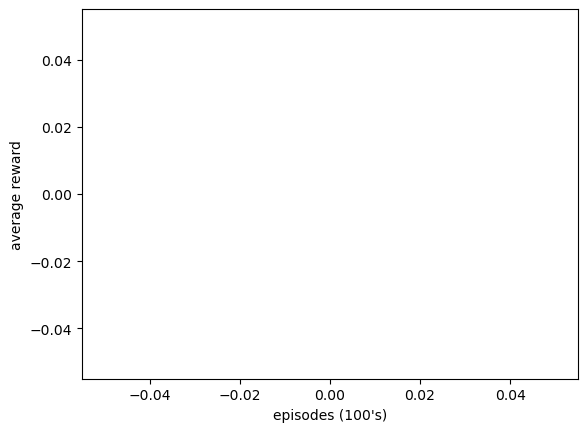

In [5]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt


def get_average(values):
    return sum(values) / len(values)


avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i + 100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()


## Sources
1. Violante, Andre. “Simple Reinforcement Learning: Q-Learning.” Medium, Towards Data Science, 1 July 2019, https://towardsdatascience.com/simple-reinforcement-learning-q-learning-fcddc4b6fe56.

2. Openai. “Openai/Gym.” GitHub, https://github.com/openai/gym/wiki/FrozenLake-v0.